<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q9_SVM_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

Shape of X after handling non-numeric columns and rows: (3, 3)

=== SVM with linear kernel ===
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
Jaccard: 1.0000
Error Rate: 0.0000
Confusion Matrix:
 [[1]]

=== SVM with poly kernel ===
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
Jaccard: 1.0000
Error Rate: 0.0000
Confusion Matrix:
 [[1]]

=== SVM with rbf kernel ===
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
Jaccard: 1.0000
Error Rate: 0.0000
Confusion Matrix:
 [[1]]

=== SVM with sigmoid kernel ===
Accuracy: 1.0000
Recall: 1.0000
Precision: 1.0000
Jaccard: 1.0000
Error Rate: 0.0000
Confusion Matrix:
 [[1]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarnin

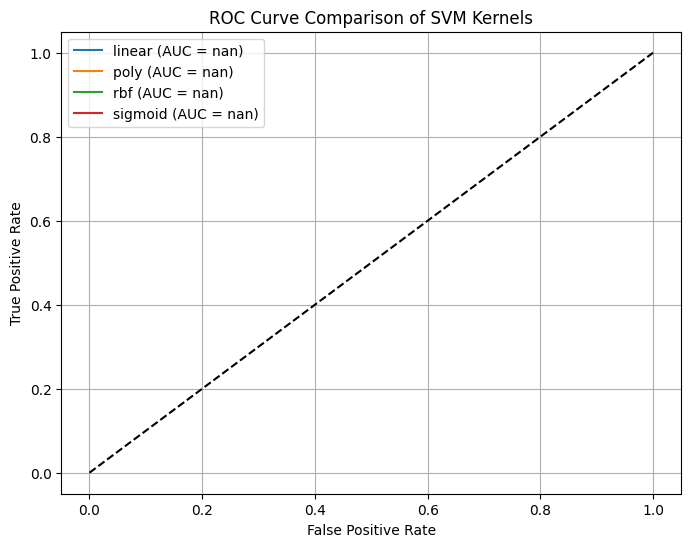

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, jaccard_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/1sample_cancer.csv")

# Encode target variable (B -> 0, M -> 1)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # B=0, M=1

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Identify and drop non-numeric columns
numeric_cols = X.select_dtypes(include=np.number).columns
non_numeric_cols = X.columns.difference(numeric_cols)
X = X[numeric_cols]

# Drop rows with any remaining NaN values (if any were in numeric columns)
X = X.dropna()
y = y[X.index] # Ensure y aligns with the cleaned X

print("Shape of X after handling non-numeric columns and rows:", X.shape)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize storage for metrics
results = {}

# Train SVM models for each kernel
for kernel in kernels:
    print(f"\n=== SVM with {kernel} kernel ===")
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    err_rate = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[kernel] = {
        'accuracy': acc,
        'recall': rec,
        'precision': prec,
        'jaccard': jaccard,
        'error_rate': err_rate,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Jaccard: {jaccard:.4f}")
    print(f"Error Rate: {err_rate:.4f}")
    print("Confusion Matrix:\n", cm)

# --- ROC Curve Comparison ---
plt.figure(figsize=(8, 6))
for kernel in kernels:
    plt.plot(results[kernel]['fpr'], results[kernel]['tpr'],
             label=f"{kernel} (AUC = {results[kernel]['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison of SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()